## Observations
- Weather is warmest when the latitude approaches 0. The southern hemisphere is colder this time of year due to the seasons (tilt of the Earth).
- Humidity does not seem to correlate with latitude. It appears that some humidity amounts are much more comman than others
- Wind speeds seem to spike at the outer spectrum range of latitude.

In [4]:
#dependencies
import requests
import json
import pandas as pd
from config import api_key
import random
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import openweathermapy.core as owm

In [5]:
settings = {"units": "imperial", "appid": api_key}

maxlatitude, minlatitude = 90, -90
maxlongitude, minlongitude = 180, -180

In [6]:
weather = []
citynames = []
i=0

while len(weather)<500:
    lat, long = (random.uniform(minlatitude,maxlatitude),random.uniform(minlongitude,maxlongitude))
    if citipy.nearest_city(lat, long).city_name not in citynames:
        try:
            citynames.append(citipy.nearest_city(lat, long).city_name)
            weather.append(owm.get_current(citynames[i],**settings))      
            print(f"Processing City #{i+1}: {weather[i]['name']}")
            i+=1
        except:
            citynames.pop()        

Processing City #1: Abu Zabad
Processing City #2: Pauini
Processing City #3: Guerrero Negro
Processing City #4: Haslett
Processing City #5: Paamiut
Processing City #6: Khorixas
Processing City #7: Ponta do Sol
Processing City #8: Vaini
Processing City #9: Ushuaia
Processing City #10: Bredasdorp
Processing City #11: Kununurra
Processing City #12: Mataura
Processing City #13: Ribeira Grande
Processing City #14: Grindavik
Processing City #15: Doha
Processing City #16: Tezu
Processing City #17: Benjamin Constant
Processing City #18: Cravo Norte
Processing City #19: Castro
Processing City #20: Clyde River
Processing City #21: Busselton
Processing City #22: Mar del Plata
Processing City #23: Maceio
Processing City #24: Katsuura
Processing City #25: Flinders
Processing City #26: Lata
Processing City #27: Broken Hill
Processing City #28: Mahebourg
Processing City #29: Port Alfred
Processing City #30: New Norfolk
Processing City #31: Sanming
Processing City #32: Tessalit
Processing City #33: Be

Processing City #268: Sao Joao da Barra
Processing City #269: Yuanping
Processing City #270: Tsaratanana
Processing City #271: Ayagoz
Processing City #272: Khatanga
Processing City #273: Casteldaccia
Processing City #274: Carnarvon
Processing City #275: Komsomolskiy
Processing City #276: Saint George
Processing City #277: Payo
Processing City #278: Nanortalik
Processing City #279: Manokwari
Processing City #280: Mezen
Processing City #281: Atar
Processing City #282: Sistranda
Processing City #283: Port-Cartier
Processing City #284: Coahuayana
Processing City #285: Jiuquan
Processing City #286: Longyearbyen
Processing City #287: Rodbyhavn
Processing City #288: Khandyga
Processing City #289: Iwanai
Processing City #290: Goksun
Processing City #291: Desterro
Processing City #292: Henties Bay
Processing City #293: Mehamn
Processing City #294: Faanui
Processing City #295: Paita
Processing City #296: Torbay
Processing City #297: Half Moon Bay
Processing City #298: Margate
Processing City #29

In [7]:
#create dataframe with weather data
dataframe = pd.DataFrame()
dataframe['City'] = pd.Series(city['name'] for city in weather)
dataframe['Cloudiness'] = pd.Series(city['clouds']['all'] for city in weather)
dataframe['Country'] = pd.Series(city['sys']['country'] for city in weather)
dataframe['Date'] = pd.Series(city['dt'] for city in weather)
dataframe['Humidity'] = pd.Series(city['main']['humidity'] for city in weather)
dataframe['Lat'] = pd.Series(city['coord']['lat'] for city in weather)
dataframe['Long'] = pd.Series(city['coord']['lon'] for city in weather)
dataframe['Max Temp'] = pd.Series(city['main']['temp_max'] for city in weather)
dataframe['Wind Speed'] = pd.Series(city['wind']['speed'] for city in weather)

## Temperature

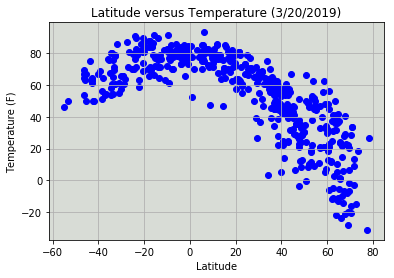

In [18]:
fig, ax = plt.subplots(1,1)
ax.scatter(dataframe['Lat'],dataframe['Max Temp'], color='b')
ax.set_xlabel('Latitude')
ax.set_title('Latitude versus Temperature (3/20/2019)')
ax.set_ylabel('Temperature (F)')           
ax.grid()
ax.set_facecolor('xkcd:light grey')
plt.savefig('Output/Temperature.png')

## Humidity

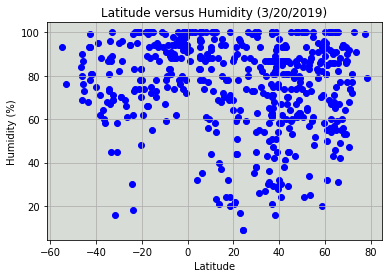

In [19]:
fig, ax = plt.subplots(1,1)
ax.scatter(dataframe['Lat'],dataframe['Humidity'], color='b')
ax.set_xlabel('Latitude')
ax.set_title('Latitude versus Humidity (3/20/2019)')
ax.set_ylabel('Humidity (%)')           
ax.grid()
ax.set_facecolor('xkcd:light grey')
plt.savefig('Output/Humidity.png')

## Cloudiness

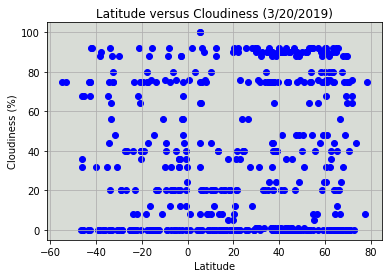

In [20]:
fig, ax = plt.subplots(1,1)
ax.scatter(dataframe['Lat'],dataframe['Cloudiness'], color='b')
ax.set_xlabel('Latitude')
ax.set_title('Latitude versus Cloudiness (3/20/2019)')
ax.set_ylabel('Cloudiness (%)')           
ax.grid()
ax.set_facecolor('xkcd:light grey')
plt.savefig('Output/Cloudiness.png')

## Wind Speed

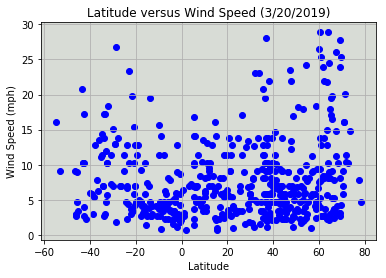

In [23]:
fig, ax = plt.subplots(1,1)
ax.scatter(dataframe['Lat'],dataframe['Wind Speed'], color='b')
ax.set_xlabel('Latitude')
ax.set_title('Latitude versus Wind Speed (3/20/2019)')
ax.set_ylabel('Wind Speed (mph)')           
ax.grid()
ax.set_facecolor('xkcd:light grey')
plt.savefig('Output/WindSpeed.png')

In [25]:
#export data to csv
dataframe.to_csv("Output/Weather Data for 500 Cities.csv", header=True)